# Normal (Gaussian) Distribution

The normal distribution curve is a symmetrical, “bell-shaped” curve similar to a histogram. A normal distribution is completely described by its mean $\mu$ and standard deviation $\sigma$.

Normal distributions can be denoted as $\mathcal{N}(\mu, \sigma^2)$, where $\mu$ is the mean and $\sigma^2$ is the variance.

When the normal distribution has a $\mu$ of 0 and a $\sigma$ of 1, it is called the *standard normal distribution* $\mathcal{N}(0,1)$ - in this special case $\sigma^2 = \sigma$  because $1^2 = 1$.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

In [53]:
rng = np.random.default_rng()
n = rng.normal(size=10000)

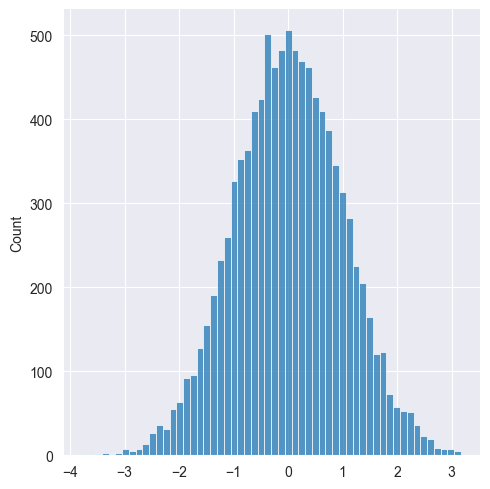

In [45]:
_ = sns.displot(n)

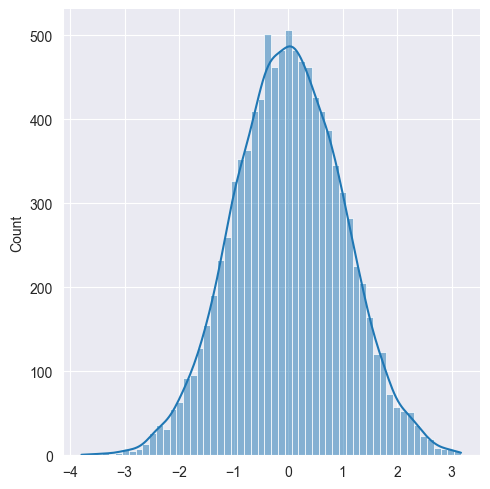

In [46]:
_ = sns.displot(n, kde=True)

### Observations

- 99.7% of the values are in an interval around $\mu \pm 3\sigma$.
- 95% of the values are in an interval around $\mu \pm 2\sigma$.
- 68% of the values are in an interval around $\mu \pm 1\sigma$.

**These percentages are unique to the normal distribution.**

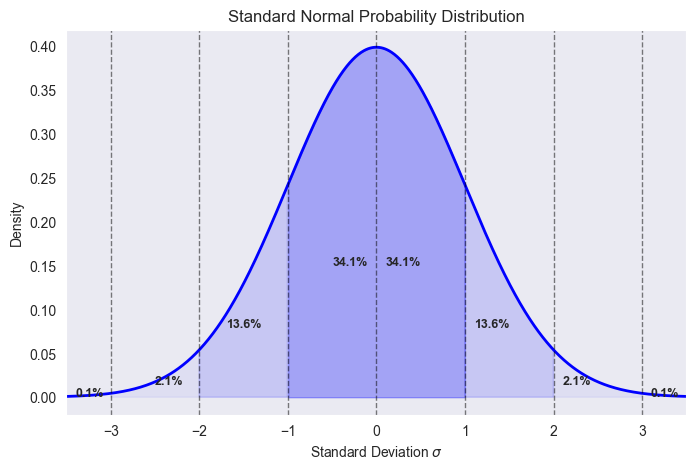

In [47]:
# Parameters for the normal distribution
mean = 0
std = 1

# Generate data for the normal distribution
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, loc=mean, scale=std)

# Plot the PDF using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(x=x, y=pdf, color='blue', linewidth=2)

# Fill the standard deviation regions
plt.fill_between(x, pdf, where=(x >= -1) & (x <= 1), color='blue', alpha=0.3)
plt.fill_between(x, pdf, where=((x >= -2) & (x <= -1)) | ((x >= 1) & (x <= 2)), color='blue', alpha=0.15)
plt.fill_between(x, pdf, where=((x >= -3) & (x <= -2)) | ((x >= 2) & (x <= 3)), color='blue', alpha=0.05)

# Add vertical lines at multiples of sigma
for i in range(-3, 4):
    plt.axvline(i, color='black', linewidth=1, linestyle='--', alpha=0.5)

# Annotate the classic rule-of-thumb percentages
plt.text(-0.3, 0.15, "34.1%", fontsize=9, ha='center', weight='bold')
plt.text(-1.5, 0.08, "13.6%", fontsize=9, ha='center', weight='bold')
plt.text(-2.5, 0.015, "2.1%", fontsize=9, weight='bold')
plt.text(-3.4, 0.001, "0.1%", fontsize=9, weight='bold')
plt.text(0.1, 0.15, "34.1%", fontsize=9, ha='left', weight='bold')
plt.text(1.1, 0.08, "13.6%", fontsize=9, ha='left', weight='bold')
plt.text(2.1, 0.015, "2.1%", fontsize=9, weight='bold')
plt.text(3.1, 0.001, "0.1%", fontsize=9, ha='left', weight='bold')

# Labeling and aesthetics
plt.xlim(-3.5, 3.5)
plt.title("Standard Normal Probability Distribution")
plt.xlabel("Standard Deviation" + ' ' + r'$\sigma$')
plt.ylabel("Density")
plt.grid(False)
plt.show()

It is one of the most common distributions and typically the default option, especially when there is limited information available about the random process being modeled.

- Assumes the greatest possible uncertainty about the random variables it represents (relative to other distributions).
- In simple and complex random processes are, under common conditions, normally distributed when values are sampled from that process.

#### Examples of the normal (Gaussian) distribution

#### Example

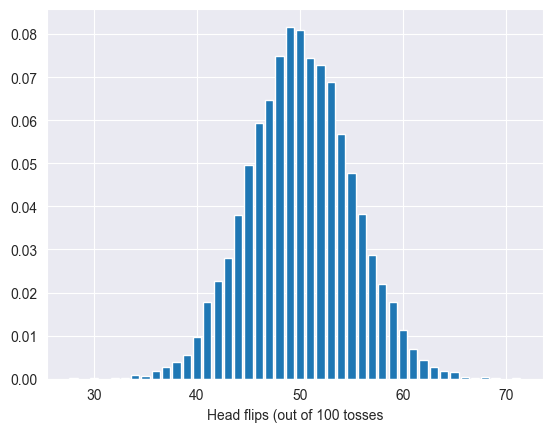

In [57]:
rng = np.random.default_rng()
n_experiments = 10000
heads_count = rng.binomial(100, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments
plt.bar(heads, event_proba)
_ = plt.xlabel('Head flips (out of 100 tosses')

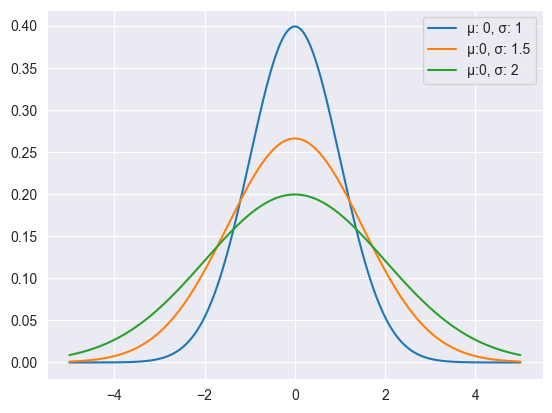

In [49]:
#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='μ: 0, σ: 1')
plt.plot(x, norm.pdf(x, 0, 1.5), label='μ:0, σ: 1.5')
plt.plot(x, norm.pdf(x, 0, 2), label='μ:0, σ: 2')

#add legend to plot
plt.legend()

The CDF for the normal distribution cannot be written in an “elementary” manner, but we can write it using Python’s `math.erf` function:

In [50]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

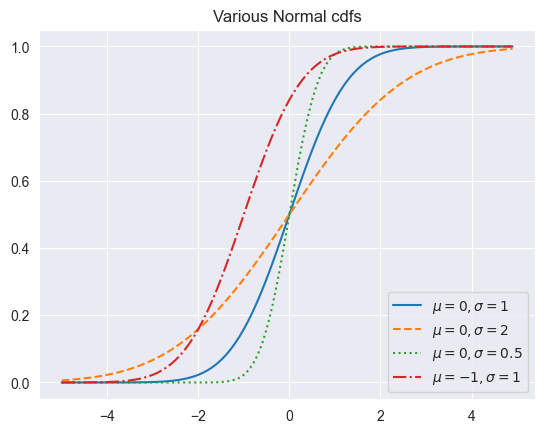

In [51]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label=r'$\mu=0,\sigma=1$')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label=r'$\mu=0,\sigma=2$')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label=r'$\mu=0,\sigma=0.5$')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label=r'$\mu=-1,\sigma=1$')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

Sometimes we’ll need to invert normal_cdf to find the value corresponding to a specified probability. There’s no simple way to compute its inverse, but normal_cdf is continuous and strictly increasing, so we can use a binary search:

In [6]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the CDF's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to the desired probability.

## Log-Normal Distribution

The natural logarithm of a log-normal distribution is normally distributed.

This property makes the log-normal distribution a useful model for data that is generated by exponential growth processes.

Real-world examples of log-normal distributions:

- Personal income
- Length of comments in online forums
- Duration of chess games or Rubik's Cube solves
- Size of publicly-available video files
- Number of hospitalized cases in an epidemic where public interventions are involved

In [63]:
x = rng.lognormal(size=10000) # defaults to mu=0 and sigma=1

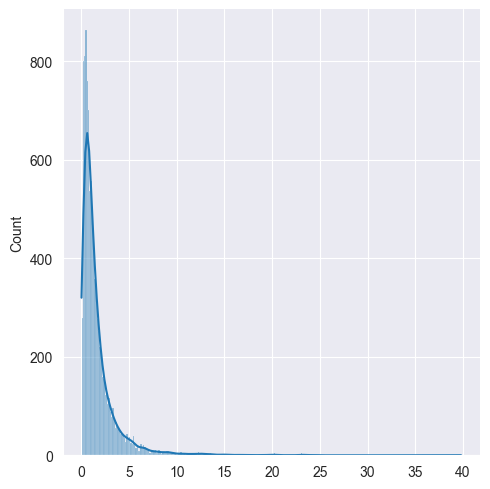

In [64]:
_ = sns.displot(x, kde=True)

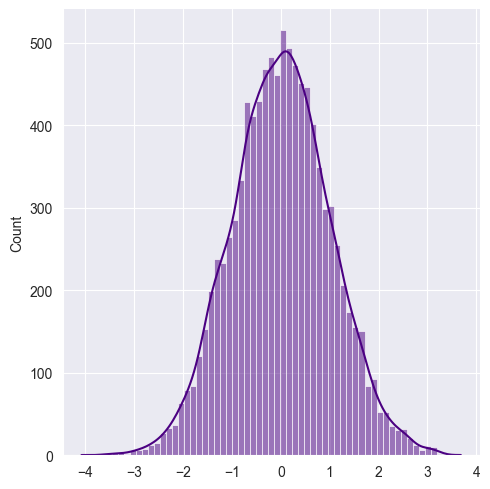

In [65]:
_ = sns.displot(np.log(x), color='indigo', kde=True)